created 7-20-24
# <mark style="background-color: #F492E2"> <font color ='5B581A'> Net Surface Heat Flux \& Meridional Velocity </font></mark>

# `THICKNESSDIFFUSE = TRUE` 


# <mark style="background-color: #9DA6F9"> <font color ='5B581A'> Table of Contents </font></mark>
1. **[Background](#1)**
2. **[Net Surface Heat Flux](#2)** \
    a. [Figures](#2a) \
    b. [Calculation of Net Surface Heat Flux at 40$^{\circ}$N](#2b)
3. **[Spatially Averaged Net Surface Heat Flux](#3)** \
    a. [Meridionally Averaged Net Surface Heat Flux](#3a) \
    b. [Zonally Averaged Net Surface Heat Flux](#3b)
4. **[Meridional Velocities]($4)**

# <mark style="background-color: #5B581A"> <font color ='AE9E01'> 1. Background </font></mark>
<a name=1></a>

## <font color ='AE9E01'> Simulations. </font>
This notebook contains residual streamfunctions for ocean simulations under different conditions where KD is the background diapycnal diffusivity measured in $m^2 /s$. The primary focus is on `zeroKD`, `SB`, and `medKD`. 

|FILE NAME | CHANGES |
| :---     | :---    |
|`zeroKD`    | KD = $0$|
|`SB`        | KD = $5 \times 10^{-6}$|
|`medKD`     | KD = $1 \times 10^{-5}$|


In [1]:
import xarray as xr
from xgcm import Grid
import numpy as np
import warnings
from matplotlib import pyplot as plt
import matplotlib.ticker as tick
import cmocean.cm as cmo
import cmocean
%matplotlib inline
plt.rcParams['figure.figsize']=(8,5)

In [2]:
path = '/h/kuyeda/'
# sb = xr.open_dataset(path + '3-12_sb/3-12_sb_linear_d2_prog__2104_366.nc',decode_times=False) <-- TD = FALSE
sb = xr.open_dataset(path + '3-12_sb/7-17_SB_linear_d2_prog__1410_014.nc',decode_times=False) # <-- TD = TRUE
medium_KD = xr.open_dataset(path + '3-7_KD1E-5/7-20_KD1E-5_linear_d2_prog__1410_014.nc',decode_times=False)
zero_KD = xr.open_dataset(path+'7-8_KD0/7-20_KD0_linear_d2_prog__1410_014.nc',decode_times=False)
ocean_geo = xr.open_dataset('/h/kuyeda/ocean_geometry.nc')

In [3]:
ocean_geo = ocean_geo.rename({'lath' : 'yh', 
                'lonh' : 'xh',
                'latq' : 'yq',
                'lonq' : 'xq'})

# <mark style="background-color: #F492E2"> <font color ='5B581A'> 2. Net Surface Heat Flux</font></mark>
<a name=2></a>

## <font color ='5B581A'> 2a. Net Surface Heat Flux Figures</font>
<a name=2a></a>

Text(0.5, 0.98, 'Net Surface Heat Flux')

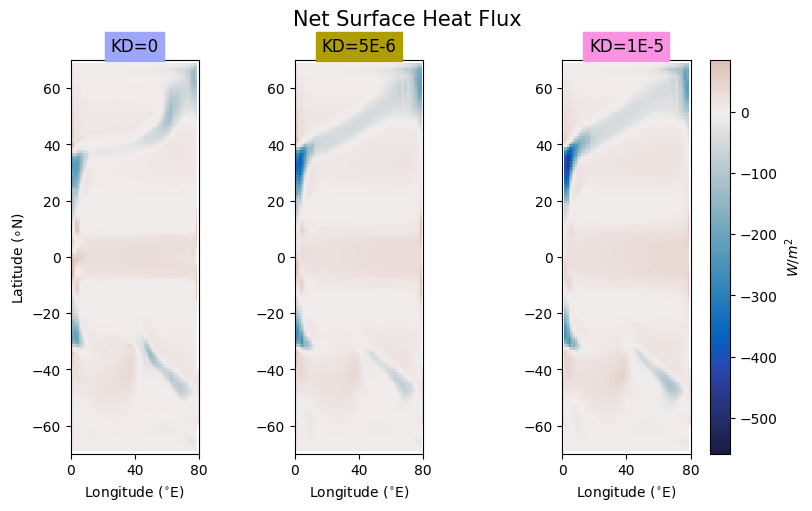

In [4]:
fig,ax=plt.subplots(nrows=1,ncols=3,constrained_layout=True)#,figsize=(7,5))

newcmap = cmocean.tools.crop(cmocean.cm.balance,-558,84,0)
zero_KD.net_heat_surface.mean(dim='Time').plot(add_colorbar=False,ax=ax[0],vmin=-558,vmax=84,cmap=newcmap)
sb.net_heat_surface.mean(dim='Time').plot(add_colorbar=False,ax=ax[1],vmin=-558,vmax=84,cmap=newcmap)
medium_KD.net_heat_surface.mean(dim='Time').plot(add_colorbar=True,ax=ax[2],vmin=-558,vmax=84,cmap=newcmap,
                                                cbar_kwargs={'label':'$W/m^2$'})

for i in range(0,3):
    ax[i].set_xlabel('Longitude ($^{\circ}$E)')
    ax[i].set_aspect(140/80)
    ax[i].set_xticks((0,40,80))
    
ax[0].set_title('KD=0',backgroundcolor='#9DA6F9')
ax[1].set_title('KD=5E-6',backgroundcolor='#AE9E01')
ax[2].set_title('KD=1E-5',backgroundcolor='#FA92E2')
ax[1].set_ylabel('')
ax[2].set_ylabel('')
ax[0].set_ylabel('Latitude (${\circ}$N)')

fig.suptitle('Net Surface Heat Flux',fontsize=15)
# ax[1].tick_params(axis='y',left=False,labelleft=False)




## <font color ='AE9E01'> All 5 simulations. </font>

In [5]:
'''
# set start & end times for each graph

dss = [zero_KD, sb, medium_KD, big_KD, weq]

starts = []
ends = []
for i in dss:
    starts = np.append(starts, int(int(i.Time[0])/365) )
    ends = np.append(ends, int(int(i.Time[-1])/365))

print('starts: ' ,starts)
print('ends: ', ends)

# different color bars
dss = [zero_KD, sb, medium_KD, big_KD, weq]

fig,ax = plt.subplots(nrows=1,ncols=5,constrained_layout=True,figsize=(12,5))

title_labels = ['KD=0','KD=5E-6','KD=1E-5','KD=5E-5','$ \\tau_{eq}^x < 0$']

for i in range(0,5):
        mean_nhs = dss[i].net_heat_surface.mean(dim='Time')
        m=mean_nhs.plot(ax=ax[i],vmin=-500,vmax=500,cmap=cmocean.cm.balance,
                     add_colorbar=False)
        ax[i].set_title(title_labels[i]+ '\n Yrs ' + str(round(starts[i])) + '-' + str(round(ends[i])))
        ax[i].set_aspect(140/80)
        ax[i].set_ylabel('')
        ax[i].set_xlabel('Longitude ($^{\circ}$E)')
for i in range(1,5):
    ax[i].tick_params(axis='y',left=False,labelleft=False)
    
fig.suptitle('Net Surface Heat Flux',fontsize=15)
fig.colorbar(m,ax=ax,label='$W/m^2$')
ax[0].set_ylabel('Latitude ($^{\circ}$N)')
'''

"\n# set start & end times for each graph\n\ndss = [zero_KD, sb, medium_KD, big_KD, weq]\n\nstarts = []\nends = []\nfor i in dss:\n    starts = np.append(starts, int(int(i.Time[0])/365) )\n    ends = np.append(ends, int(int(i.Time[-1])/365))\n\nprint('starts: ' ,starts)\nprint('ends: ', ends)\n\n# different color bars\ndss = [zero_KD, sb, medium_KD, big_KD, weq]\n\nfig,ax = plt.subplots(nrows=1,ncols=5,constrained_layout=True,figsize=(12,5))\n\ntitle_labels = ['KD=0','KD=5E-6','KD=1E-5','KD=5E-5','$ \\tau_{eq}^x < 0$']\n\nfor i in range(0,5):\n        mean_nhs = dss[i].net_heat_surface.mean(dim='Time')\n        m=mean_nhs.plot(ax=ax[i],vmin=-500,vmax=500,cmap=cmocean.cm.balance,\n                     add_colorbar=False)\n        ax[i].set_title(title_labels[i]+ '\n Yrs ' + str(round(starts[i])) + '-' + str(round(ends[i])))\n        ax[i].set_aspect(140/80)\n        ax[i].set_ylabel('')\n        ax[i].set_xlabel('Longitude ($^{\\circ}$E)')\nfor i in range(1,5):\n    ax[i].tick_params(ax

## <font color ='5B581A'> 2b. Calculation of Amount of Heat Present at 40$^{\circ}$N </font>
<a name=2b></a>

## <font color ='AE9E01'> Integrate net surface heat flux. </font>

Net surface heat flux ($Q_{net}$) gives the amount of watts of heat moving through the surface of the ocean. We can use $(Q_{net})$ to calculate the net amount of watts of heat moving through any latitude in the ocean. 

Let's arbitrarily divide a basin at a latitude, $\varphi^*$. The net heat transport in the north basin is $Q_{N}$, and the net heat transport in the south basin is $Q_{S}$. We will also assume that the system is in equilibrium, so no heat is entering or exiting the model. Therefore, $\forall \,t \in Time, Q_S + Q_N = Q_{total}$. 

Say at $t=n$, $Q_S$ loses 5W of heat. Then 

\begin{align}
    Q_{S_n} -5 &= Q_{S_{n+\Delta t}} \label{eq1}\tag{1}
\end{align}

Since we are at equilibrium, 

\begin{align}
    Q_{S_{n+\Delta t}} + Q_{N_{n+\Delta t}} &= Q_{total} \label{eq2}\tag{2} \\
    \implies Q_{N_{n+\Delta t}} &= Q_{total} - Q_{S_{n+\Delta t}} \label{eq3}\tag{3}
\end{align}

Plug Equation \ref{eq1} into Equation \ref{eq3}

\begin{align}
    Q_{N_{n+\Delta t}} &= Q_{total} - (Q_{S_n} - 5) \label{eq4}\tag{4} \\
    \implies Q_{N_{n+\Delta t}} &= Q_{total} - (Q_{total} - Q_{N_n} -5) \label{eq5}\tag{5} \\
    \implies Q_{N_{n+\Delta t}} &= Q_{N_n} + 5 \label{eq56}\tag{6}
    \end{align}

Therefore, any heat that leaves the southern basin must enter the northern basin. The heat must be transfered between basins by passing through $\varphi^*$. Thus, the net surface heat transport (calculated from net surface heat flux) can be used to calculate the net heat transport at any latitude in the basin.  

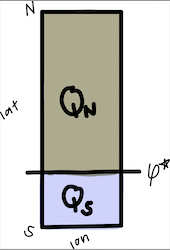

In [6]:
# dx * dy = A
heat40_med = (medium_KD.mean(dim='Time').net_heat_surface * ocean_geo.Ah).sum(dim='xh').cumsum('yh')
heat40_sb = (sb.mean(dim='Time').net_heat_surface * ocean_geo.Ah).sum(dim='xh').cumsum('yh')
heat40_zero = (zero_KD.mean(dim='Time').net_heat_surface * ocean_geo.Ah).sum(dim='xh').cumsum('yh')

In [7]:
# dx * dy = A
heat40_med = (medium_KD.isel(Time=-1).net_heat_surface * ocean_geo.Ah).sum(dim='xh').cumsum('yh')
heat40_sb = (sb.isel(Time=-1).net_heat_surface * ocean_geo.Ah).sum(dim='xh').cumsum('yh')
heat40_zero = (zero_KD.isel(Time=-1).net_heat_surface * ocean_geo.Ah).sum(dim='xh').cumsum('yh')

## <font color ='AE9E01'> Heat transport by latitude. </font>

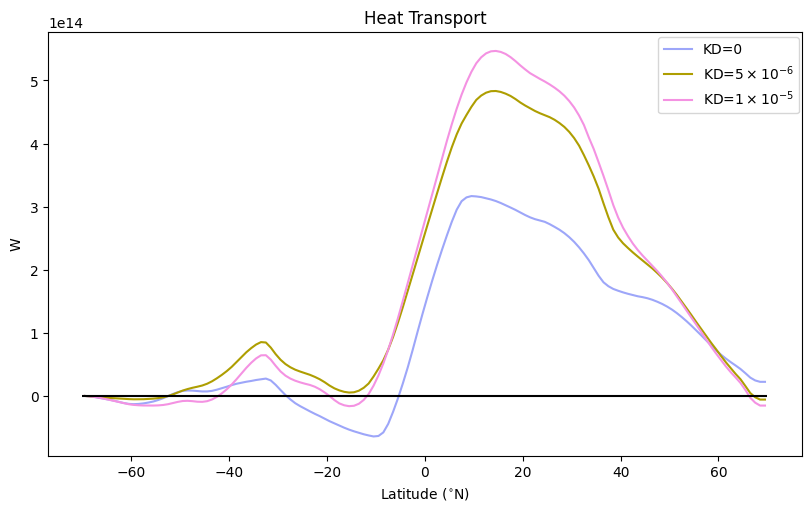

In [16]:
fig,ax = plt.subplots(nrows=1,ncols=1,constrained_layout=True)
heat40_zero.plot(color='#9DA6F9',label='KD=0')
heat40_sb.plot(color='#AE9E01',label='KD=$5 \\times 10^{-6}$')
heat40_med.plot(color='#F492E2',label='KD=$1 \\times 10^{-5}$')
ax.set_title('Heat Transport')
ax.set_ylabel('W')
ax.set_xlabel('Latitude ($^{\circ}$N)')
ax.hlines(y=0,xmin=-70,xmax=70,color='black')

fig.legend(bbox_to_anchor=(1,0.95))

In [11]:
print('At 40N:')
# between KD_med & KD_small
print('There is an', int(((heat40_med.sel(yh=0,method='nearest') - heat40_sb.sel(yh=0,method='nearest')) / heat40_sb.sel(yh=0,method='nearest'))*100) , 
'% increase in net surface heat present when KD is increased from 5E-6 to 1E-5')

# between KD_med & KD_zero
print('There is a ', int(((heat40_med.sel(yh=0,method='nearest') - heat40_zero.sel(yh=0,method='nearest')) / heat40_zero.sel(yh=0,method='nearest'))*100) ,
'% increase in net surface heat present when KD is increased from 0 to 1E-5')

# between KD_small & KD_zero
print('There is a ', int(((heat40_sb.sel(yh=0,method='nearest') - heat40_zero.sel(yh=0,method='nearest')) / heat40_zero.sel(yh=0,method='nearest'))*100) ,
'% increase in net surface heat flux present when KD is increased from 0 to 5E-6')

At 40N:
There is an 8 % increase in net surface heat present when KD is increased from 5E-6 to 1E-5
There is a  86 % increase in net surface heat present when KD is increased from 0 to 1E-5
There is a  72 % increase in net surface heat flux present when KD is increased from 0 to 5E-6


## <font color ='AE9E01'> Comparison of heat flux north \& south of 40$^{\circ}$N. </font>

In [12]:
'''
# south of 40N
before_40_sb = sb.isel(Time=-1).where(sb.yh < 40)
before_40_sb.net_heat_surface.sum()

before_40_kd = medium_KD.isel(Time=-1).where(medium_KD.yh < 40)
before_40_kd.net_heat_surface.sum()

before_40_zero = zero_KD.isel(Time=-1).where(zero_KD.yh < 40)
before_40_zero.net_heat_surface.sum()

# north of 40N
after_40_sb = sb.isel(Time=-1).where(sb.yh >=40)
after_40_sb.net_heat_surface.sum()

after_40_kd = medium_KD.isel(Time=-1).where(medium_KD.yh >=40)
after_40_kd.net_heat_surface.sum()

after_40_zero = zero_KD.isel(Time=-1).where(zero_KD.yh >=40)
after_40_zero.net_heat_surface.sum()
'''

'\n# south of 40N\nbefore_40_sb = sb.isel(Time=-1).where(sb.yh < 40)\nbefore_40_sb.net_heat_surface.sum()\n\nbefore_40_kd = medium_KD.isel(Time=-1).where(medium_KD.yh < 40)\nbefore_40_kd.net_heat_surface.sum()\n\nbefore_40_zero = zero_KD.isel(Time=-1).where(zero_KD.yh < 40)\nbefore_40_zero.net_heat_surface.sum()\n\n# north of 40N\nafter_40_sb = sb.isel(Time=-1).where(sb.yh >=40)\nafter_40_sb.net_heat_surface.sum()\n\nafter_40_kd = medium_KD.isel(Time=-1).where(medium_KD.yh >=40)\nafter_40_kd.net_heat_surface.sum()\n\nafter_40_zero = zero_KD.isel(Time=-1).where(zero_KD.yh >=40)\nafter_40_zero.net_heat_surface.sum()\n'

# <mark style="background-color: #9DA6F9"> <font color ='5B581A'> 3. Spatially Averaged Net Surface Heat Flux </font></mark>
<a name=3></a>

## <font color ='9DA6F9'> 3a. Meridional Average Net Surface Heat Flux </font>
<a name=3a></a>

In [13]:
'''
fig,ax=plt.subplots(nrows=1,ncols=1,constrained_layout=True)
dss[0].net_heat_surface.mean(dim='yh').mean(dim='Time').plot(label='KD=0',color='#9DA6F9')
dss[1].net_heat_surface.mean(dim='yh').mean(dim='Time').plot(label='KD=$5 \\times 10^{-6}$',color='#AE9E01')
dss[2].net_heat_surface.mean(dim='yh').mean(dim='Time').plot(label='KD=$1 \\times 10^{-5}$',color='#F492E2')
#dss[0].net_heat_surface.mean(dim='yh').plot(vmin=-65,vmax=65,cmap='RdBu_r')
fig.legend(bbox_to_anchor=(1,0.5))
ax.set_title('Meridional Avg Net Surface Heat Flux')
'''

"\nfig,ax=plt.subplots(nrows=1,ncols=1,constrained_layout=True)\ndss[0].net_heat_surface.mean(dim='yh').mean(dim='Time').plot(label='KD=0',color='#9DA6F9')\ndss[1].net_heat_surface.mean(dim='yh').mean(dim='Time').plot(label='KD=$5 \\times 10^{-6}$',color='#AE9E01')\ndss[2].net_heat_surface.mean(dim='yh').mean(dim='Time').plot(label='KD=$1 \\times 10^{-5}$',color='#F492E2')\n#dss[0].net_heat_surface.mean(dim='yh').plot(vmin=-65,vmax=65,cmap='RdBu_r')\nfig.legend(bbox_to_anchor=(1,0.5))\nax.set_title('Meridional Avg Net Surface Heat Flux')\n"

## <font color ='9DA6F9'> 3b. Zonal Average Net Surface Heat Flux </font>
<a name=3b></a>

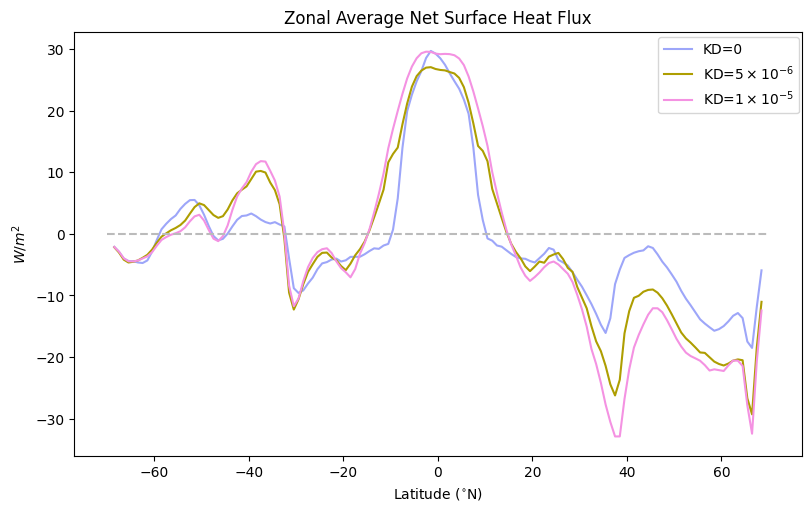

In [14]:
fig,ax=plt.subplots(nrows=1,ncols=1,constrained_layout=True)

dss = [zero_KD, sb, medium_KD]

dss[0].net_heat_surface.mean(dim='xh').mean(dim='Time').plot(label='KD=0',color='#9DA6F9')
dss[1].net_heat_surface.mean(dim='xh').mean(dim='Time').plot(label='KD=$5\\times 10^{-6}$',color='#AE9E01')
dss[2].net_heat_surface.mean(dim='xh').mean(dim='Time').plot(label='KD=$1\\times 10^{-5}$',color='#F492E2')
#dss[0].net_heat_surface.mean(dim='yh').plot(vmin=-65,vmax=65,cmap='RdBu_r')
fig.legend(bbox_to_anchor=(1,0.95))
ax.set_title('Zonal Average Net Surface Heat Flux')
ax.set_ylabel('$W/m^2$')
ax.set_xlabel('Latitude ($^{\circ}$N)')
ax.hlines(y=0,xmin=-70,xmax=70,linestyles='dashed',color='#BBBBBB')

# <mark style="background-color: #5B581A"> <font color ='AE9E01'> 4. Meridional Velocities </font></mark>
<a name=4></a>

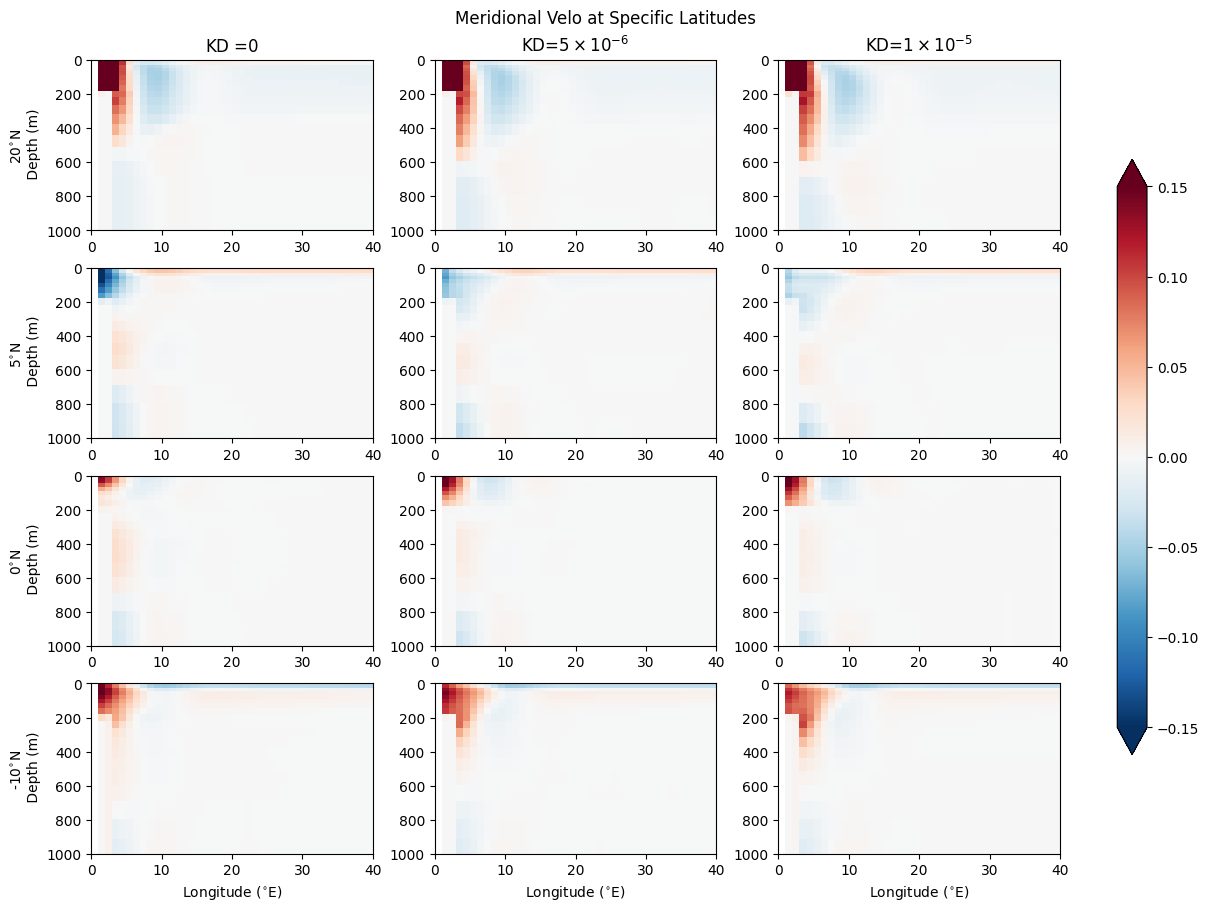

In [15]:
fig,ax = plt.subplots(nrows=4,ncols=3,constrained_layout=True,figsize=(12,9))

dss = [zero_KD,sb,medium_KD]
plot_titles = ['KD =$0$','KD=$5 \\times 10^{-6}$','KD=$1 \\times 10^{-5}$']
lat = [20,5,0,-10]

for i in range(0,4):
        for j in range(0,3):
            mean_v = dss[j].v.mean(dim='Time').sel(yq=lat[i],method='nearest')
            m=mean_v.plot(ax=ax[i,j],vmin=-0.15,vmax=0.15,cmap='RdBu_r',add_colorbar=False)
            ax[i,j].set_ylim(0,1000)
            ax[i,j].set_xlim(0,40)
            ax[i,j].invert_yaxis()
            ax[i,j].set_xlabel('')
            ax[i,j].set_ylabel('')
            ax[i,j].set_title('')
            
# ax[0,0].set_title('KD=0 \n yq = 10.0 [degrees_north]')
# ax[0,1].set_title('KD=5E-6 \n yq = 10.0 [degrees_north]')
# ax[0,2].set_title('KD=1E-5 \n yq = 10.0 [degrees_north]')

for i in range(0,4):
    ax[i,0].set_ylabel(str(lat[i]) +  '$^{\circ}$N \n Depth (m)')

for i in range(0,3):
    ax[-1,i].set_xlabel('Longitude ($^{\circ}$E)')
    ax[0,i].set_title(plot_titles[i])
    
fig.suptitle('Meridional Velo at Specific Latitudes')
#fig.supylabel('depth')
fig.colorbar(m,ax=ax,cmap='RdBu_r',shrink=0.75,extend='both')